In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/')
%cd 'drive/Shareddrives/CSCI 461/processed'
#%ls processed/*


Mounted at /content/drive/
/content/drive/Shareddrives/CSCI 461/processed


# Data Loading

In [ ]:
# Importing the data

data = pd.read_csv("combined_ohe_17.csv")

In [ ]:
data['subabuse']= data[['subabuse_no','subabuse_yes']].idxmax(1)
data.replace('subabuse_yes', 'Substance Abuse Referral', inplace=True)
data.replace('subabuse_no', 'No Subsance Abuse Referral', inplace=True)

#Sex

In [ ]:
data['sex']= data[['sex_male','sex_female']].idxmax(1)
data.replace('sex_female', 'Female', inplace=True)
data.replace('sex_male', 'Male', inplace=True)

In [ ]:
data[['sex', 'subabuse']].value_counts()

sex     subabuse                  
Female  No Subsance Abuse Referral    18482
Male    No Subsance Abuse Referral    16109
        Substance Abuse Referral       5647
Female  Substance Abuse Referral       5126
dtype: int64

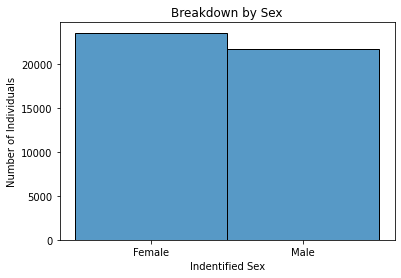

In [ ]:
sns.histplot(data['sex'], element="bars").set(title="Breakdown by Sex", xlabel='Indentified Sex', ylabel='Number of Individuals')
plt.show()

# sns.histplot(df2, x="race", element="bars").set(title="Breakdown by Race")
# plt.xticks(rotation=45)
# plt.show()
# sns.histplot(data['sex_male','sex_female'])

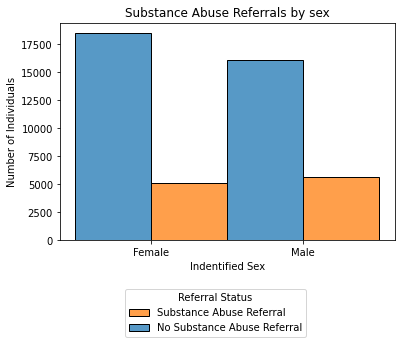

In [ ]:
sns.histplot(data, x="sex", hue="subabuse", multiple="dodge").set(title="Substance Abuse Referrals by sex", xlabel='Indentified Sex', ylabel='Number of Individuals')
plt.legend(title='Referral Status', bbox_to_anchor=(0.75, -0.2), labels=['Substance Abuse Referral', 'No Substance Abuse Referral'])
plt.show()


Demographics 

In [ ]:
data['mult']= data[["amiakn_yes","asian_yes",
                   "blkafram_yes","raceunkn_yes","hisorgin_yes","hawaiipi_yes",
                   "white_yes"]].sum(axis="columns")

In [ ]:
data.mult.value_counts()

1    34073
2    10474
3      739
4       47
0       29
5        2
Name: mult, dtype: int64

In [ ]:
d= data[data["mult"] == 1][["amiakn_yes","asian_yes",
                   "blkafram_yes","raceunkn_yes","hisorgin_yes","hawaiipi_yes",
                   "white_yes", 'subabuse']]
# d['race']= d[["amiakn_yes","asian_yes",
#                    "blkafram_yes","raceunkn_yes","hisorgin_yes","hawaiipi_yes",
#                    "white_yes"]].idxmax(1)
# d.replace("amiakn_yes", "Native American", inplace=True)
# d.replace("blkafram_yes", "Black/African American", inplace=True)
# d.replace("asian_yes", "Asian", inplace=True)
# d.replace("raceunkn_yes", "Unknown Race", inplace=True)
# d.replace("hisorgin_yes", "Hispanic", inplace=True)
# d.replace("hawaiipi_yes", "Native Hawaiian", inplace=True)
# d.replace("white_yes", "White", inplace=True)

In [ ]:
for i in ['amiakn','asian', 'blkafram', 'hawaiipi', 'white','raceunkn', 'hisorgin']:
  print(i)
  print(d[d[i+'_yes']==1].shape)
  print(d[d[i+'_yes']==1].subabuse.value_counts())
  print(d[d[i+'_yes']==1].subabuse.value_counts()[1]/len(d[d[i+'_yes']==1]))
  print(d[d[i+'_yes']==0].subabuse.value_counts()[1]/len(d[d[i+'_yes']==0]))

amiakn
(725, 8)
No Subsance Abuse Referral    436
Substance Abuse Referral      289
Name: subabuse, dtype: int64
0.3986206896551724
0.23455679501019552
asian
(336, 8)
No Subsance Abuse Referral    273
Substance Abuse Referral       63
Name: subabuse, dtype: int64
0.1875
0.23855114562646354
blkafram
(12589, 8)
No Subsance Abuse Referral    10321
Substance Abuse Referral       2268
Name: subabuse, dtype: int64
0.18015728016522362
0.2719698380189909
hawaiipi
(100, 8)
No Subsance Abuse Referral    72
Substance Abuse Referral      28
Name: subabuse, dtype: int64
0.28
0.2379242339504901
white
(19947, 8)
No Subsance Abuse Referral    14559
Substance Abuse Referral       5388
Name: subabuse, dtype: int64
0.2701158068882539
0.1927651139742319
raceunkn
(376, 8)
No Subsance Abuse Referral    301
Substance Abuse Referral       75
Name: subabuse, dtype: int64
0.19946808510638298
0.2384782028073716
hisorgin
(0, 8)
Series([], Name: subabuse, dtype: int64)


IndexError: ignored

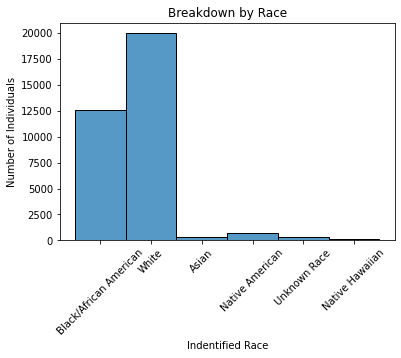

In [ ]:
sns.histplot(d['race'], element="bars").set(title="Breakdown by Race", xlabel='Indentified Race', ylabel='Number of Individuals')
plt.xticks(rotation=45)
plt.show()

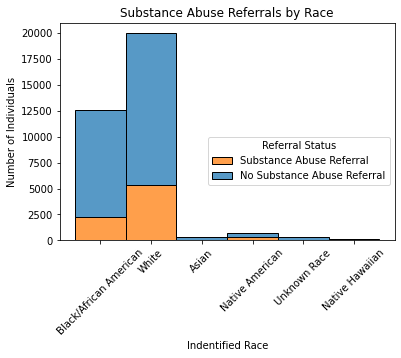

In [ ]:
sns.histplot(d, x="race", hue="subabuse", multiple="stack").set(title="Substance Abuse Referrals by Race", xlabel='Indentified Race', ylabel='Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Referral Status', bbox_to_anchor=(1, 0.5), labels=['Substance Abuse Referral', 'No Substance Abuse Referral'])
plt.show()

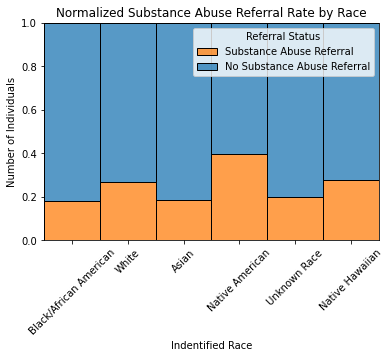

In [ ]:
sns.histplot(d, x="race", hue="subabuse", multiple="fill").set(title="Normalized Substance Abuse Referral Rate by Race", xlabel='Indentified Race', ylabel='Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Referral Status',labels=['Substance Abuse Referral', 'No Substance Abuse Referral'])
plt.show()

In [ ]:
s.keys()

MultiIndex([(                 'White', 'No Subsance Abuse Referral'),
            ('Black/African American', 'No Subsance Abuse Referral'),
            (                 'White',   'Substance Abuse Referral'),
            ('Black/African American',   'Substance Abuse Referral'),
            (       'Native American', 'No Subsance Abuse Referral'),
            (          'Unknown Race', 'No Subsance Abuse Referral'),
            (       'Native American',   'Substance Abuse Referral'),
            (                 'Asian', 'No Subsance Abuse Referral'),
            (          'Unknown Race',   'Substance Abuse Referral'),
            (       'Native Hawaiian', 'No Subsance Abuse Referral'),
            (                 'Asian',   'Substance Abuse Referral'),
            (       'Native Hawaiian',   'Substance Abuse Referral')],
           names=['race', 'subabuse'])

In [ ]:
s = d[['race','subabuse']].value_counts()
for i,j in s.keys():
  print('{} {}'.format(i,j))
  print(s[i]/sum(s[i]))
  print(sum(s[i]))

White No Subsance Abuse Referral
subabuse
No Subsance Abuse Referral    0.729884
Substance Abuse Referral      0.270116
dtype: float64
19947
Black/African American No Subsance Abuse Referral
subabuse
No Subsance Abuse Referral    0.819843
Substance Abuse Referral      0.180157
dtype: float64
12589
White Substance Abuse Referral
subabuse
No Subsance Abuse Referral    0.729884
Substance Abuse Referral      0.270116
dtype: float64
19947
Black/African American Substance Abuse Referral
subabuse
No Subsance Abuse Referral    0.819843
Substance Abuse Referral      0.180157
dtype: float64
12589
Native American No Subsance Abuse Referral
subabuse
No Subsance Abuse Referral    0.601379
Substance Abuse Referral      0.398621
dtype: float64
725
Unknown Race No Subsance Abuse Referral
subabuse
No Subsance Abuse Referral    0.800532
Substance Abuse Referral      0.199468
dtype: float64
376
Native American Substance Abuse Referral
subabuse
No Subsance Abuse Referral    0.601379
Substance Abuse Referr

#State

In [ ]:
data["state"]=data[["st_AK",
"st_AL",
"st_AR",
"st_AZ",
"st_CA",
"st_CO",
"st_CT",
"st_DC",
"st_DE",
"st_FL",
"st_GA",
"st_HI",
"st_IA",
"st_ID",
"st_IL",
"st_IN",
"st_KS",
"st_KY",
"st_LA",
"st_MA",
"st_MD",
"st_ME",
"st_MI",
"st_MN",
"st_MO",
"st_MS",
"st_MT",
"st_NC",
"st_ND",
"st_NE",
"st_NH",
"st_NJ",
"st_NM",
"st_NV",
"st_NY",
"st_OH",
"st_OK",
"st_OR",
"st_PA",
"st_PR",
"st_RI",
"st_SC",
"st_SD",
"st_TN",
"st_TX",
"st_UT",
"st_VA",
"st_VT",
"st_WA",
"st_WI",
"st_WV",
"st_WY"]].idxmax(axis=1)

mapping={"st_AK":"West",
"st_AZ":"West",
"st_CA":"West",
"st_CO":"West",
"st_HI":"West",
"st_ID":"West",
"st_MT":"West",
"st_NM":"West",
"st_NV":"West",
"st_OR":"West",
"st_UT":"West",
"st_WA":"West",
"st_WY":"West",
"st_AL":"South",
"st_AR":"South",
"st_DC":"South",
"st_DE":"South",
"st_FL":"South",
"st_GA":"South",
"st_KY":"South",
"st_LA":"South",
"st_MD":"South",
"st_MS":"South",
"st_NC":"South",
"st_OK":"South",
"st_PR":"South",
"st_SC":"South",
"st_TN":"South",
"st_TX":"South",
"st_VA":"South",
"st_WV":"South",
"st_CT":"Northeast",
"st_ME":"Northeast",
"st_MA":"Northeast",
"st_NH":"Northeast",
"st_NJ":"Northeast",
"st_NY":"Northeast",
"st_PA":"Northeast",
"st_RI":"Northeast",
"st_VT":"Northeast",
"st_IA":"Midwest",
"st_IL":"Midwest",
"st_IN":"Midwest",
"st_KS":"Midwest",
"st_MI":"Midwest",
"st_MN":"Midwest",
"st_MO":"Midwest",
"st_ND":"Midwest",
"st_NE":"Midwest",
"st_OH":"Midwest",
"st_SD":"Midwest",
"st_WI":"Midwest"
}
data['region'] = data.state.map(mapping)

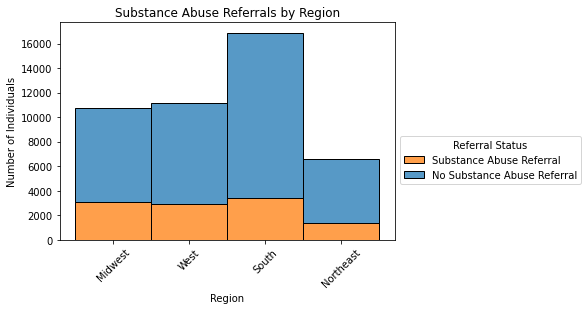

In [ ]:
sns.histplot(data, x="region", hue="subabuse", multiple="stack").set(title="Substance Abuse Referrals by Region", xlabel='Region', ylabel='Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Referral Status', bbox_to_anchor=(1, 0.5), labels=['Substance Abuse Referral', 'No Substance Abuse Referral'])
plt.show()

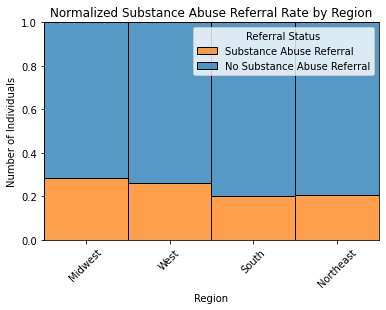

In [ ]:
sns.histplot(data, x="region", hue="subabuse", multiple="fill").set(title="Normalized Substance Abuse Referral Rate by Region", xlabel='Region', ylabel='Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Referral Status',labels=['Substance Abuse Referral', 'No Substance Abuse Referral'])
plt.show()